# Práctica 4. 4. Clasificación Lineal. Perceptron.

### Grupo 41
Alumnos:
- Óscar Rico Rodríguez
- Jia Hao Yang

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [32]:
df_original = pd.read_csv('iris_pca_2d.csv')

In [33]:
df_original.head()

,pc1,pc2,clase
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


In [34]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     150 non-null    float64
 1   pc2     150 non-null    float64
 2   clase   150 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [35]:
df_original['clase'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Ejercicio 1: Obtención de superficies de decisión

Generamos un conjunto de datos que contenga solo las muestras pertenecientes a las clases setosa y versicolor del conjunto de datos original.

In [36]:
df = df_original[(df_original['clase'] == 'setosa') | (df_original['clase'] == 'versicolor')]

Comprobamos que todo haya salido bien

In [37]:
df['clase'].unique()

array(['setosa', 'versicolor'], dtype=object)

In [38]:
df.size

300

Dividimos el conjunto anterior en entrenamiento (70%) y test (30%)

In [39]:
train_df, test_df = train_test_split(df, train_size= 0.7, random_state=False)

Entrenamos un clasificador lineal utilizando la clase Perceptron.

In [40]:
clf = Perceptron()
clf.fit(train_df[['pc1','pc2']], train_df['clase'])

Perceptron()

In [41]:
clf.coef_[0]

array([ 1.92486638, -1.10481574])

In [42]:
clf.intercept_[0]

1.0

Mostramos un gráfico con las muestras de entrenamiento de la clase setosa en rojo, la clase versicolor en azul y la superficie de decisión en negro.

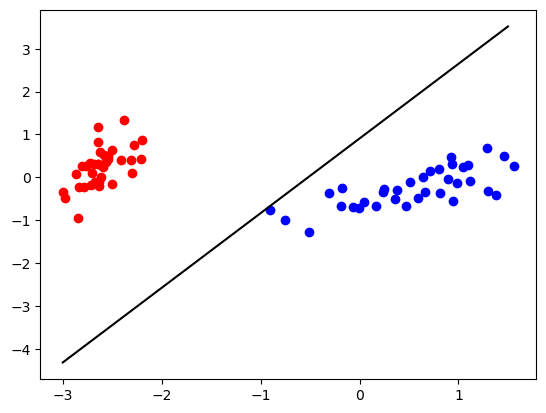

In [43]:
coefs = clf.coef_[0]
intercept = clf.intercept_[0]
plt.scatter(train_df[train_df['clase'] == 'setosa']['pc1'], train_df[train_df['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(train_df[train_df['clase'] == 'versicolor']['pc1'], train_df[train_df['clase'] == 'versicolor']['pc2'], color='blue')
x = np.linspace(-3, 1.5, 100)
y = -(coefs[0] * x + intercept) / coefs[1]
plt.plot(x, y, color='black')
plt.show()

Mostramos un gráfico con las muestras de test de la clase setosa en rojo, la clase versicolor en azul y la superficie de decisión en negro.

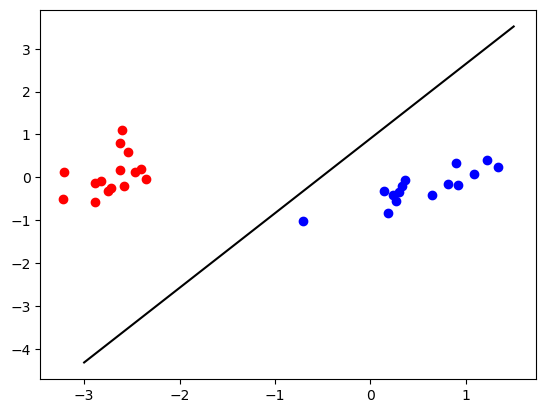

In [44]:
plt.scatter(test_df[test_df['clase'] == 'setosa']['pc1'], test_df[test_df['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(test_df[test_df['clase'] == 'versicolor']['pc1'], test_df[test_df['clase'] == 'versicolor']['pc2'], color='blue')
x = np.linspace(-3, 1.5, 100)
y = -(coefs[0] * x + intercept) / coefs[1]
plt.plot(x, y, color='black')
plt.show()

Explicar los resultados obtenidos de acuerdo a las gráficas (separación de la superficie de las muestras, muestras mal clasificadas, ...)

En estas gráficas podemos observar que mediante el uso del algoritmo Perceptron para clasificar setosas y vesicolores es bastante acertado, la separación con la superficie de decisión es considerable exceptuando una muestra en la primera gráfica que se encuentra bastante próxima. En cuanto a la clasificación de las muestras ha sido bastante acertada, no ha clasificado mal ninguna muestra.

Generamos un conjunto de datos que contenga solo las muestras pertenecientes a las clases setosa y virginica del conjunto de datos original y repetimos los pasos 2-6.

In [45]:
df_setosa_virginica = df_original[(df_original['clase'] == 'setosa') | (df_original['clase'] == 'virginica')]

In [46]:
train_df_setvir, test_df_setvir = train_test_split(df_setosa_virginica, train_size= 0.7, random_state=False)

In [47]:
clf_setvir = Perceptron()
clf_setvir.fit(train_df_setvir[['pc1','pc2']], train_df_setvir['clase'])

Perceptron()

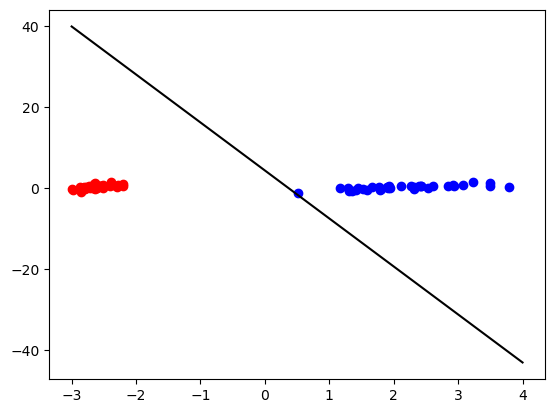

In [48]:
coefs_setvir = clf_setvir.coef_[0]
intercept_setvir = clf_setvir.intercept_[0]
plt.scatter(train_df_setvir[train_df_setvir['clase'] == 'setosa']['pc1'], train_df_setvir[train_df_setvir['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(train_df_setvir[train_df_setvir['clase'] == 'virginica']['pc1'], train_df_setvir[train_df_setvir['clase'] == 'virginica']['pc2'], color='blue')
x = np.linspace(-3, 4, 100)
y = -(coefs_setvir[0] * x + intercept_setvir) / coefs_setvir[1]
plt.plot(x, y, color='black')
plt.show()

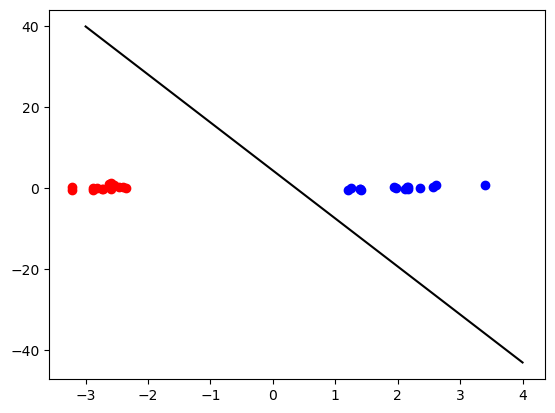

In [49]:
plt.scatter(test_df_setvir[test_df_setvir['clase'] == 'setosa']['pc1'], test_df_setvir[test_df_setvir['clase'] == 'setosa']['pc2'], color='red')
plt.scatter(test_df_setvir[test_df_setvir['clase'] == 'virginica']['pc1'], test_df_setvir[test_df_setvir['clase'] == 'virginica']['pc2'], color='blue')
x = np.linspace(-3, 4, 100)
y = -(coefs_setvir[0] * x + intercept_setvir) / coefs_setvir[1]
plt.plot(x, y, color='black')
plt.show()

En estas gráficas podemos observar que mediante el uso del algoritmo Perceptron para clasificar setosas y virginicas es bastante acertado, la separación con la superficie de decisión es considerable exceptuando una muestra en la primera gráfica que se encuentra bastante próxima. En cuanto a la clasificación de las muestras ha sido bastante acertada, no ha clasificado mal ninguna muestra.

Generamos un conjunto de datos que contenga solo las muestras pertenecientes a las clases versicolor y virginica del conjunto de datos original y repetimos los pasos 2-6.

In [50]:
df_versicolor_virginica = df_original[(df_original['clase'] == 'versicolor') | (df_original['clase'] == 'virginica')]

In [51]:
train_df_vervir, test_df_vervir = train_test_split(df_versicolor_virginica, train_size= 0.7, random_state=False)

In [52]:
clf_vervir = Perceptron()
clf_vervir.fit(train_df_vervir[['pc1','pc2']], train_df_vervir['clase'])

Perceptron()

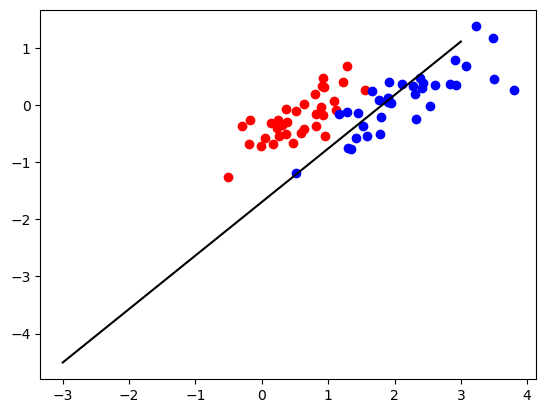

In [53]:
coefs_vervir = clf_vervir.coef_[0]
intercept_vervir = clf_vervir.intercept_[0]
plt.scatter(train_df_vervir[train_df_vervir['clase'] == 'versicolor']['pc1'], train_df_vervir[train_df_vervir['clase'] == 'versicolor']['pc2'], color='red')
plt.scatter(train_df_vervir[train_df_vervir['clase'] == 'virginica']['pc1'], train_df_vervir[train_df_vervir['clase'] == 'virginica']['pc2'], color='blue')
x = np.linspace(-3, 3, 100)
y = -(coefs_vervir[0] * x + intercept_vervir) / coefs_vervir[1]
plt.plot(x, y, color='black')
plt.show()

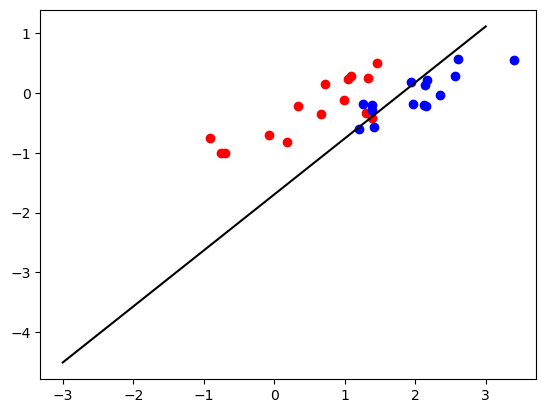

In [54]:
plt.scatter(test_df_vervir[test_df_vervir['clase'] == 'versicolor']['pc1'], test_df_vervir[test_df_vervir['clase'] == 'versicolor']['pc2'], color='red')
plt.scatter(test_df_vervir[test_df_vervir['clase'] == 'virginica']['pc1'], test_df_vervir[test_df_vervir['clase'] == 'virginica']['pc2'], color='blue')
x = np.linspace(-3, 3, 100)
y = -(coefs_vervir[0] * x + intercept_vervir) / coefs_vervir[1]
plt.plot(x, y, color='black')
plt.show()

En estas gráficas podemos observar que mediante el uso del algoritmo Perceptron para clasificar versicolores y virginicas no es muy acertado, la separación con la superficie de decisión es nula exceptuando algunas muestras que presentan una ligera distancia sobre la recta. En cuanto a la clasificación de las muestras no ha sido muy buena porque ha clasificado algunas muestras en el lado contrario de la recta.

## Ejercicio 2: Clasificación de muestras

Generamos 3 clases haciendo uso de la función make_blobs 

In [55]:
X, y = make_blobs(n_samples=100,
n_features=2,
centers=[[0,0], [2,2], [2,0]],
cluster_std=0.6,
random_state=123)

 Dividimos el conjunto de datos en entrenamiento (70%) y test (30%)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Entrenamos un clasificador lineal con la clase Perceptron

In [57]:
clf_blob = Perceptron()
clf_blob.fit(X_train, y_train)
decision_array = clf_blob.decision_function(X_test)

Obtenemos la clasificación de las muestras de test utilizando la funcion decision_function

In [58]:
resultado = []
for idx, val in enumerate(decision_array):
    resultado.append(np.argmax(val))

In [59]:
count = 0
for i in range(len(resultado)):
    if resultado[i] == y_test[i]:
        count += 1

Mostramos el porcentaje de muestras de test correctamente clasificadas con respecto al número de muestras de test.

In [60]:
print(f'El porcentaje de aciertos es de {count/y_test.size * 100}%')

El porcentaje de aciertos es de 93.33333333333333%
